In [1]:
from __future__ import division, print_function, unicode_literals
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplot
import math
import random
import scipy.io
import shutil
import os

### Reading the data from facedata.mat file
- Taking note of the shape of data matrix

In [2]:
mat = scipy.io.loadmat('./data/facedata.mat')
mat['X'].shape

(165, 4096)

#### Storing the data in matrix X for use 

In [3]:
X=mat['X']

### Chosing the 5 pictures to use
- Tried to capture variations as much as possible

In [4]:
img=np.array([10,14,23,40,48])

### Visualising the selected pictures

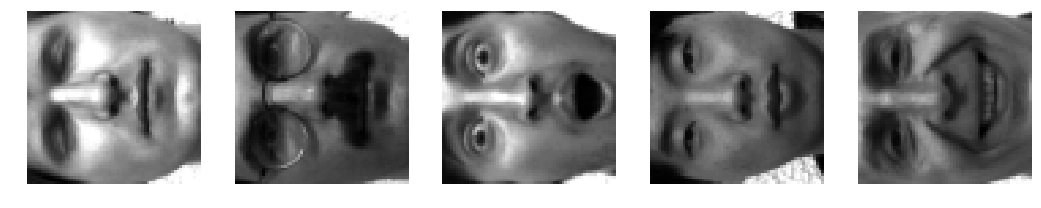

In [5]:
# shutil.rmtree('./fig/orig/') 
# os.mkdir('./fig/orig')
fig = mplot.figure(figsize=(18,6))
for i in range(img.size):
    mplot.subplot(1,5,i+1)
    mplot.imshow(X[img[i]].reshape(64,64),cmap='gray')
    mplot.axis('off')
mstr='./fig/orig/original'
# mplot.savefig(mstr,bbox_inches='tight')
mplot.show()

In [6]:
def PPCA(Z_cap,Xm):
    for i in range(0,100):
        Z=Z_cap
        W_cap = (np.linalg.pinv(Z.T.dot(Z)).dot(Z.T.dot(Xm))).T
        Z_cap= Xm.dot(W_cap).dot(np.linalg.pinv(W_cap.T.dot(W_cap)))
    return Z_cap,W_cap

### Visualising reconstructed images using diffrent values of K
- After checking the all the basis, 10 of them is selected on being more like a normal face and some looking different than others
- For each K the reconstruction image is visualized
- ALT-OPT is run 100 times for each K 

Note: The method to save the pictures are commented.

Basis Images: 


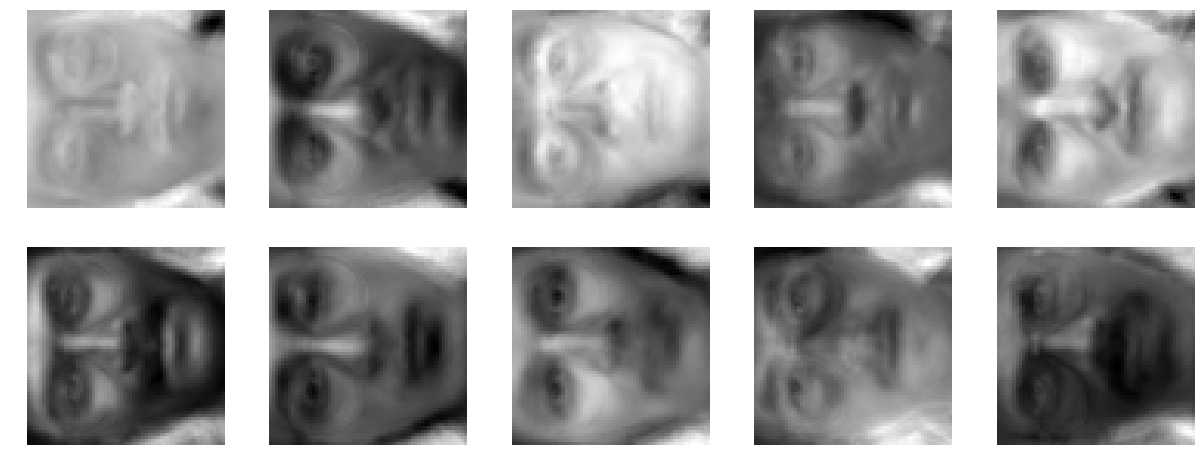

Reconstructed Images: 


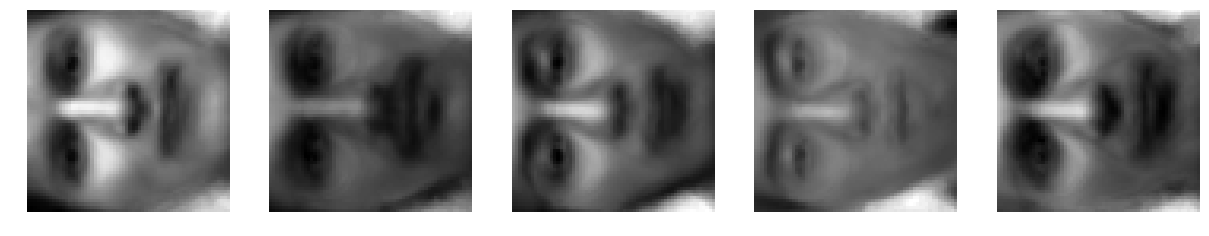

Basis Images: 


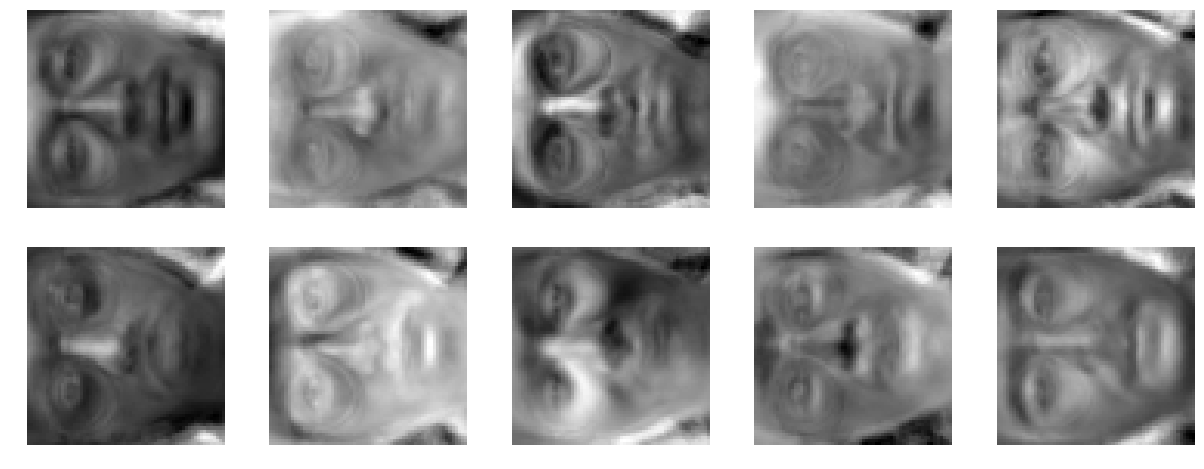

Reconstructed Images: 


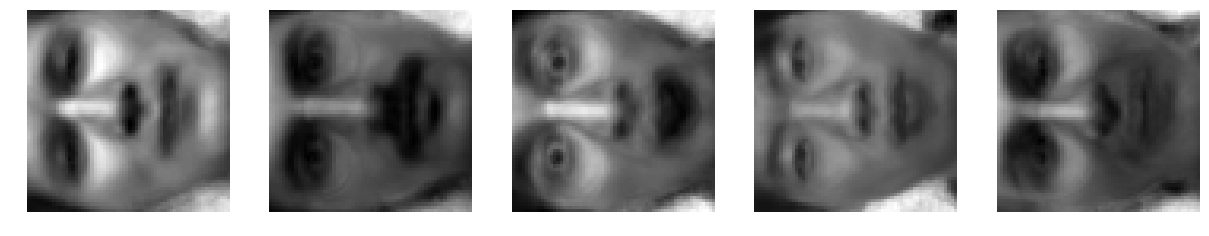

Basis Images: 


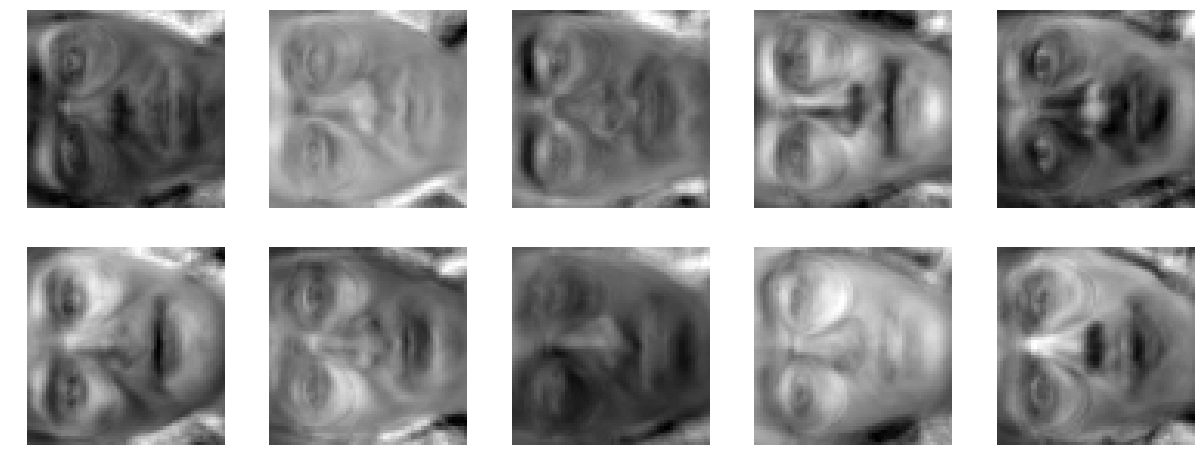

Reconstructed Images: 


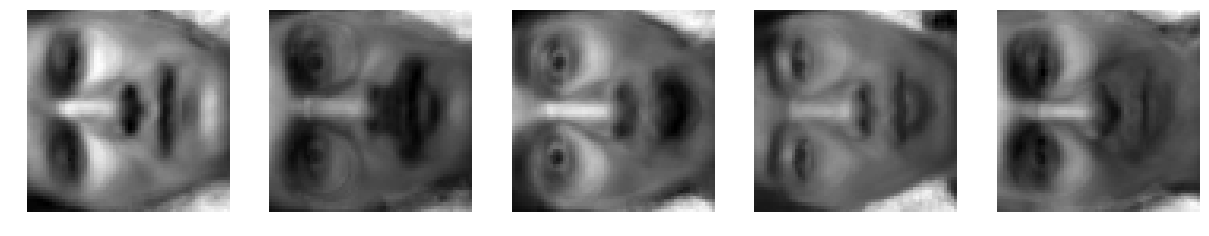

Basis Images: 


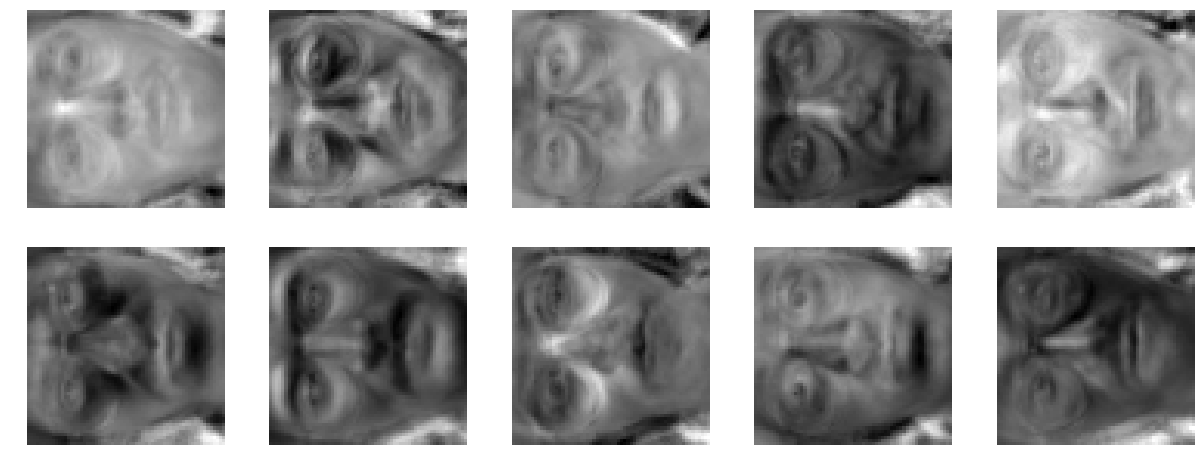

Reconstructed Images: 


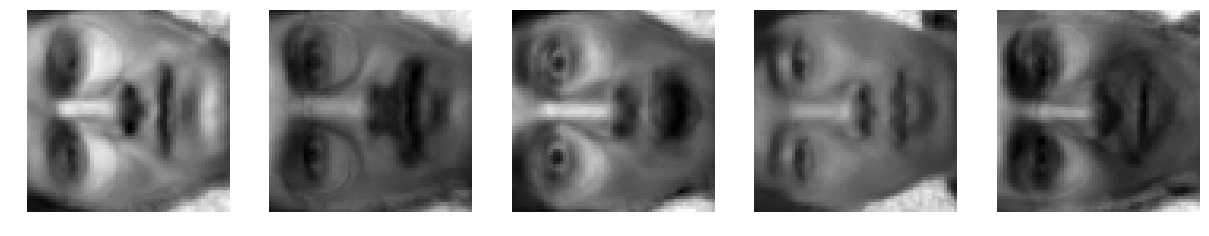

Basis Images: 


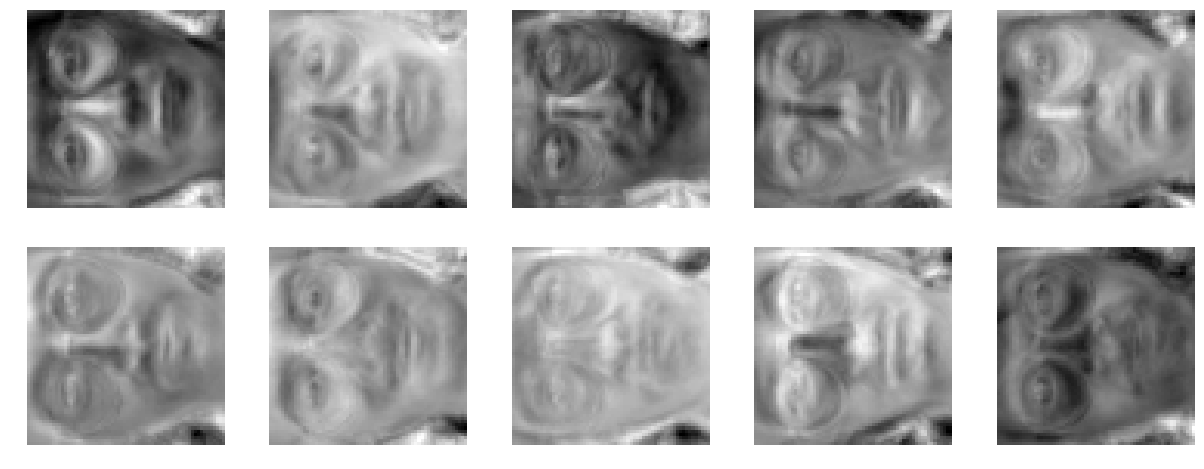

Reconstructed Images: 


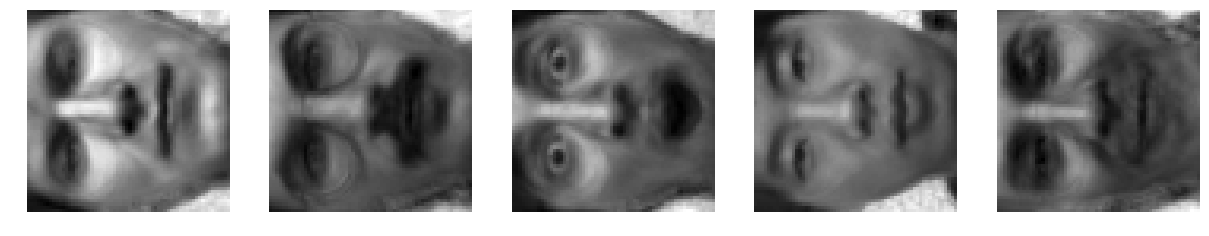

Basis Images: 


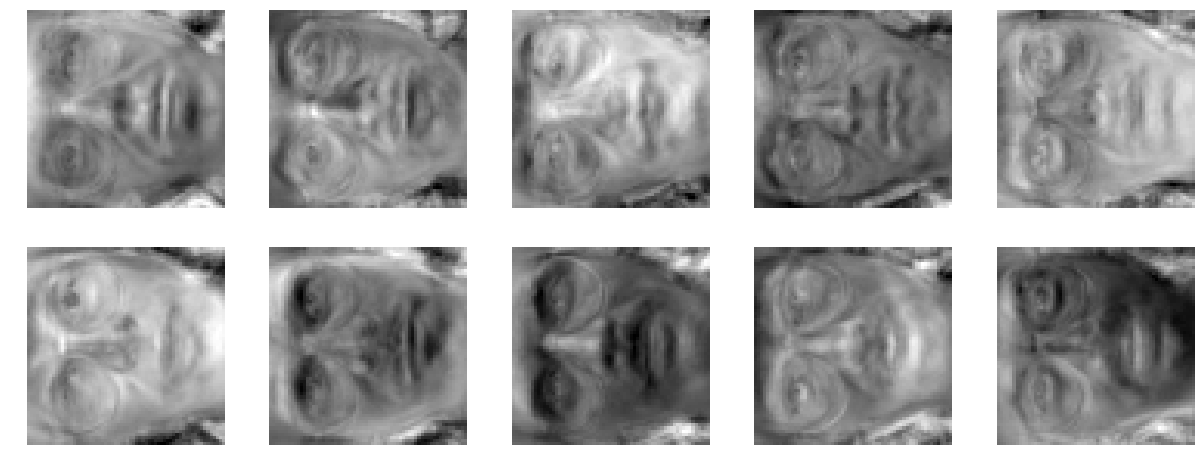

Reconstructed Images: 


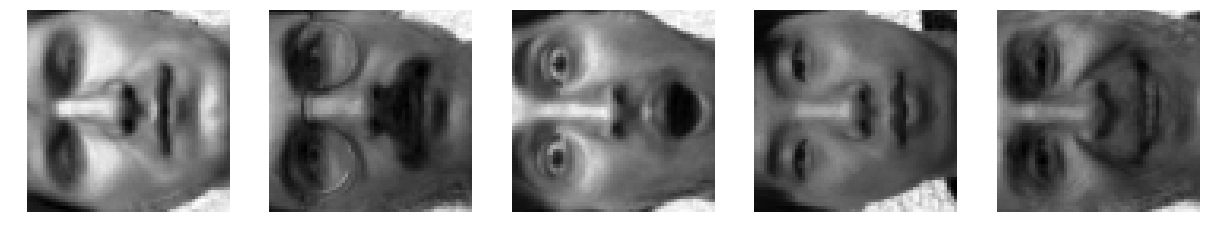

In [7]:
# shutil.rmtree('./fig/cons/')
# os.mkdir('./fig/cons')
Xm=X-X.mean()
K=np.array([10,20,30,40,50,100])
N=X.shape[0]
B_20=np.array([0,2,7,9,10,11,14,16,18,19])
B_30=np.array([0,4,7,11,15,17,18,20,22,24])
B_40=np.array([0,4,7,12,15,19,20,28,29,38])
B_50=np.array([2,4,26,27,29,30,32,38,42,49])
B_100=np.array([8,19,24,39,40,54,69,71,85,93])
for j in range(K.size):
    k=K[j]
    Z_cap=np.random.randint(256,size=(N,k))
    Z_cap,W_cap=PPCA(Z_cap,Xm)
    if(k==10):
        Basis=np.arange(0,10,1)
    elif(k==20):
        Basis=B_20
    elif k==30:
        Basis=B_30
    elif k==40:
        Basis=B_40
    elif k==50:
        Basis=B_50
    elif k==100:
        Basis=B_100
    print('Basis Images: ')
    fig=mplot.figure(figsize=(21,8))
    for pk in range(Basis.size):
        W_show=W_cap[:,Basis[pk]]
        mplot.subplot(2,5,pk+1)
        mplot.imshow(W_show.reshape(64,64),cmap='gray')
        mplot.axis('off')
#     mplot.savefig('./fig/cons/basis_k_'+str(k),bbox_inches='tight')

#     Uncomment to see all basis for W_cap
#     fig=mplot.figure(figsize=(21,2.5*(j+1)))
#     for pk in range(W_cap.shape[1]):
#         W_show=W_cap[:,pk]
#         mplot.subplot(k/10,10,pk+1)
#         mplot.imshow(W_show.reshape(64,64),cmap='gray')
#         mplot.axis('off')

    mplot.show()
    print('Reconstructed Images: ')
    fig=mplot.figure(figsize=(21,6))
    for i in range(img.size):
        mplot.subplot(1,5,i+1)
        mplot.imshow((Z_cap[img[i]].dot(W_cap.T)+X.mean()).reshape(64,64),cmap='gray')
        mplot.axis('off')
#     mplot.savefig('./fig/cons/constructed_k_'+str(k),bbox_inches='tight')
    mplot.show()